Сделать заголовки и содержание

Изменения которы делаются в разделе EDA (Конвертация дроби + новые колонки) нужно вынести отдельной функцией и сохранить измененнный датасет для Леонида

In [1]:
import numpy as np
import pandas as pd

# визуализация
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
from fractions import Fraction

from wordcloud import WordCloud

Пути

In [2]:
rating_data = pd.read_csv('Books_rating.csv')
books_data = pd.read_csv('books_data.csv')

Нужно удалить солонку 	Unnamed: 0

In [2]:
rating_data = pd.read_csv('Rating_data_with_additional.csv')

In [3]:
rating_data.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/month,review/day,review/year,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,10,23,1999,38,6,457,86
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,9,21,2004,17,3,1423,252
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",3,9,2004,47,7,1752,310
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,25,2004,47,8,3662,560
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2,10,2005,22,3,1542,273


# EDA

## Анализ датасета в целом

In [3]:
rating_data.sample(n=5, random_state=42)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
2945667,B0006CR6U4,"A dictionary of the Targumim, the Talmud Babli...",NaN,A303XPDO694V6X,Ariel,2/6,4.0,1122163200,Jastrow,Jastrow made a great workthis dictionary can h...
2352586,0897166159,Espresso Coffee: Professional Techniques,NaN,A3780H4TM9RMB8,David barnes,0/1,2.0,1356912000,NOT the book,Extremely disappointed by the SHORT length and...
1531260,0736693408,The First King of Shannara (The Sword of Shann...,NaN,A1AX6VPDQQZDPV,M Carlton,4/4,5.0,1105574400,Great (what do you expect?),"This, like all of Brook's Shannara series book..."
941910,0395051029,Wuthering Heights (Riverside editions),NaN,A35RQKCCCQ62O0,LadyJ,0/0,4.0,1353888000,Satisfied,I enjoyed this classic. I didn't know the stor...
2582125,4770016050,"A Cat, a Man, and Two Women (Japans Modern Wri...",NaN,A2IJQDE1I4SIJT,"David C. Arnold ""master D""",1/2,5.0,1167955200,"Ordered 09/02/2006, still on backorder",I would love to read this book. Have accepted ...


In [6]:
books_data.sample(n=5, random_state=42)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
71763,The Evolution of Physics: The Growth of Ideas ...,Clear and concise explanations of the developm...,"['Albert Einstein', 'Leopold Infeld']",http://books.google.com/books/content?id=lWEmN...,http://books.google.com/books?id=lWEmNBaHCJMC&...,Simon and Schuster,1966,http://books.google.com/books?id=lWEmNBaHCJMC&...,['Reference'],4.0
170424,Love is Now,Ram Dass’s long-awaited Be Love Now is the tra...,"['Ram Dass', 'Rameshwar Das']",http://books.google.com/books/content?id=ZCAOH...,http://books.google.com/books?id=ZCAOHdptArYC&...,Harper Collins,2010-11-02,https://play.google.com/store/books/details?id...,"['Body, Mind & Spirit']",NaN
81510,"Lustful Turk, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23661,Rebel Waltz,"From a ""New York Times""-bestselling author com...",['Kay Hooper'],http://books.google.com/books/content?id=E_tvD...,http://books.google.com/books?id=E_tvDwAAQBAJ&...,Bantam,2009,http://books.google.com/books?id=E_tvDwAAQBAJ&...,['Fiction'],1.0
193241,Mobil 99: America's Best Hotels & Restaurants ...,Road maps for ten states and three Canadian pr...,"[""Fodor's Travel Publications, Inc. Staff""]",http://books.google.com/books/content?id=7eRL4...,http://books.google.com/books?id=7eRL4pNAO0wC&...,Fodors Travel Publications,1999,http://books.google.com/books?id=7eRL4pNAO0wC&...,['Travel'],NaN


In [7]:
rating_data.shape

(3000000, 10)

In [8]:
books_data.shape

(212404, 10)

In [9]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [10]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


РАЗОБРАТЬСЯ С ДУБЛИКАТАМИ

In [11]:
rating_data.duplicated().sum()

8774

In [12]:
books_data.duplicated().sum()

0

In [13]:
nan_data_raithings = rating_data.isna()

In [14]:
nan_data_raithings.sum() / len(nan_data_raithings) * 100

Id                     0.000000
Title                  0.006933
Price                 83.960967
User_id               18.726233
profileName           18.729533
review/helpfulness     0.000000
review/score           0.000000
review/time            0.000000
review/summary         0.001267
review/text            0.000267
dtype: float64

На будущее: Сделать размер фигуры побольше, для того, чтобы видеть nan-ы в последних двух столбцах

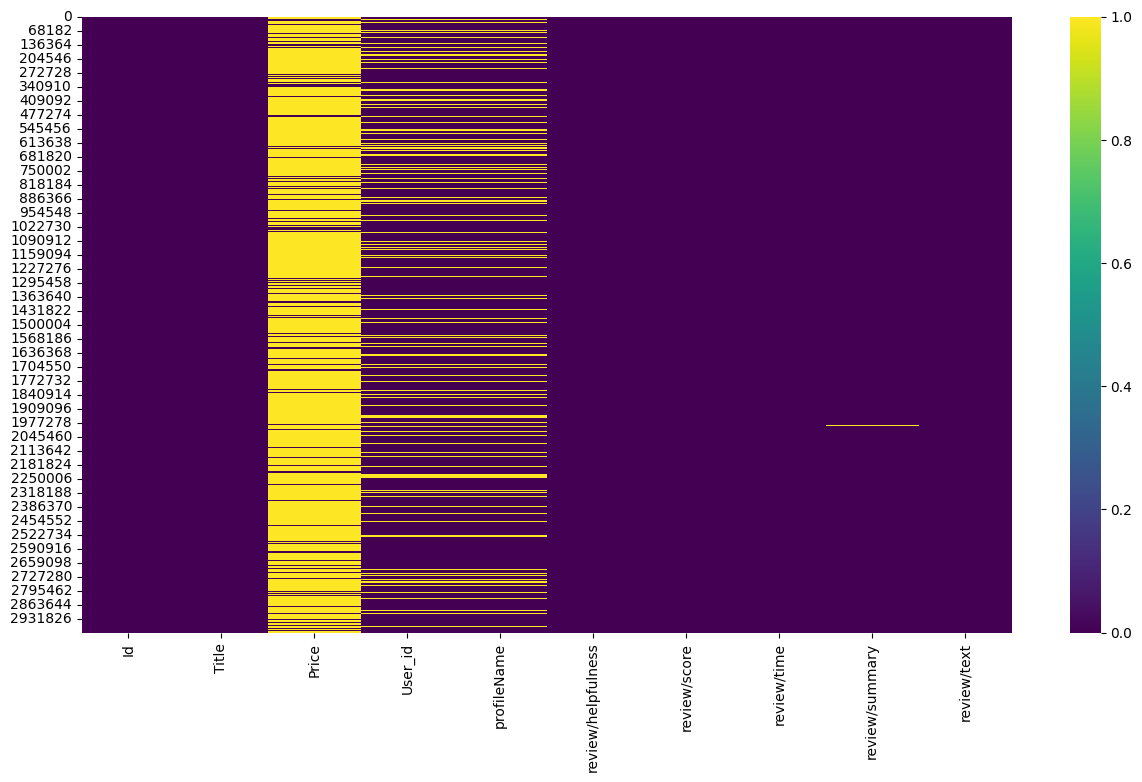

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_raithings, cmap="viridis");

In [16]:
nan_data_books = books_data.isna()
nan_data_books.sum() / len(nan_data_books) * 100

Title             0.000471
description      32.222557
authors          14.789270
image            24.516958
previewLink      11.222011
publisher        35.727199
publishedDate    11.913617
infoLink         11.222011
categories       19.396527
ratingsCount     76.576712
dtype: float64

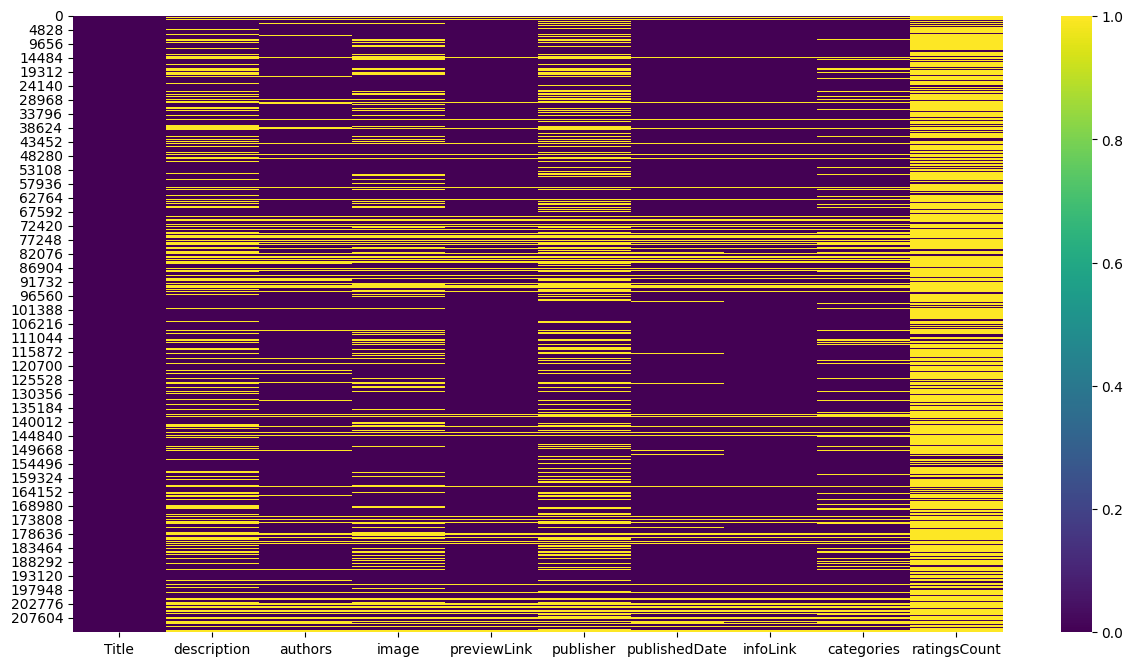

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(nan_data_books, cmap="viridis");

In [18]:
rating_data.columns

Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')

In [19]:
books_data.columns

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')

## Анализ и обработка отдельных признаков

В id и title надо сделать bar как в user_id

### ID

In [3]:
len(rating_data.Id.unique())

221998

In [3]:
id_count = rating_data.Id.value_counts()
print(id_count)

B000IEZE3G    6796
B000ILIJE0    4438
B000GQG7D2    4428
B000GQG5MA    4427
B000NDSX6C    4426
              ... 
B000855WQ4       1
B000Q390E8       1
0967826330       1
025201684X       1
1882931173       1
Name: Id, Length: 221998, dtype: int64


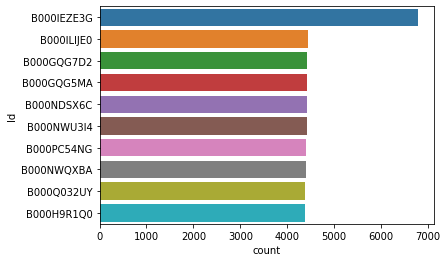

In [7]:
sns.barplot(y=id_count[:10:].index, x=id_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('Id');

Возможно (точно) есть книги, которых нет в датасете книг, т.к. id тут больше, чем записей там. Видимо у каких то книг разные id, потому что id больше чем книг.

### Title

In [4]:
len(rating_data.Title.unique())

212404

In [5]:
title_count = rating_data.Title.value_counts()
print(title_count)

The Hobbit                                                                                                         22023
Pride and Prejudice                                                                                                20371
Atlas Shrugged                                                                                                     12513
Wuthering Heights                                                                                                  10780
The Giver                                                                                                           7644
                                                                                                                   ...  
Illuminatus! Part I: The Eye in the Pyramid (The eye in the Pyramid, The Golden Apple,Leviathan, Parts 1, 2, 3)        1
Modern Chess Openings                                                                                                  1
Child Abuse and Neglect: Cases a

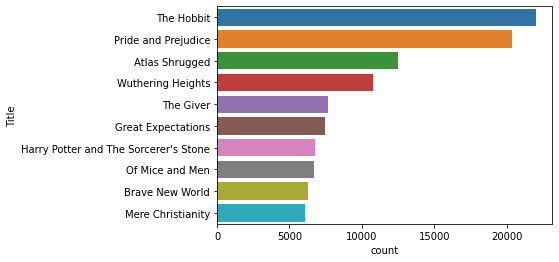

In [8]:
sns.barplot(y=title_count[:10:].index, x=title_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('Title');

Видимо у каких то книг разные id, потому что id больше чем книг

### User_id

In [9]:
user_id_count = rating_data.User_id.value_counts()
print(user_id_count)

A14OJS0VWMOSWO    5795
AFVQZQ8PW0L       3606
A1D2C0WDCSHUWZ    3146
AHD101501WCN1     1995
A1X8VZWTOG8IS6    1804
                  ... 
A1DVHZFOA7SLCV       1
A2V8PZ1JVYYHXC       1
A1BDK3CZP7RU0K       1
A3CS4YIHR7RJL8       1
A18SQGYBKS852K       1
Name: User_id, Length: 1008972, dtype: int64


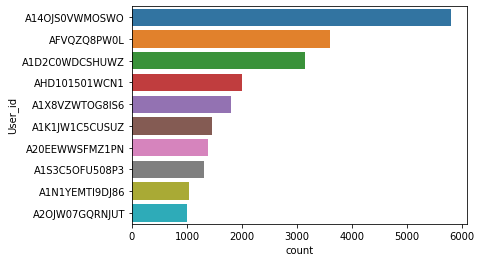

In [10]:
sns.barplot(y=user_id_count[:10:].index, x=user_id_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('User_id');

### Profile_name

In [11]:
profile_name_count = rating_data.profileName.value_counts()
print(profile_name_count)

Midwest Book Review                  5817
A Customer                           5016
Harriet Klausner                     3606
E. A Solinas "ea_solinas"            3146
Shalom Freedman "Shalom Freedman"    1995
                                     ... 
D. Jarman "World Traveler"              1
Josh McCoy                              1
Thoughtful Buyer                        1
Producer Tom "tech junkie"              1
Julia A. Klein "knitting rat"           1
Name: profileName, Length: 854146, dtype: int64


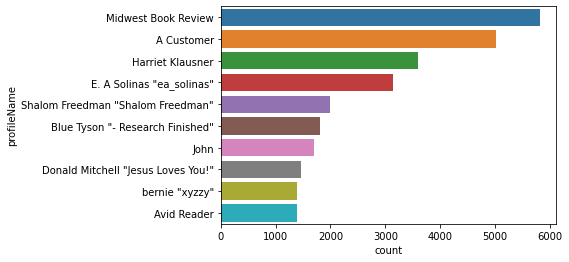

In [12]:
sns.barplot(y=profile_name_count[:10:].index, x=profile_name_count[:10:].values, orient='h')
plt.xlabel('count')
plt.ylabel('profileName');

### Helpfulnes

Заменили object с рациональной дробью на стобец с дробями типа float

На будущее: из стобца review/helpfulness сделать столбец со знаменателями

In [13]:
def convert_to_fract(x):
    x = re.sub(r'\d+/0', '0', x)
    return float(Fraction(x))

rating_data['review/helpfulness'] = rating_data['review/helpfulness'].apply(lambda x: convert_to_fract(x))

In [14]:
rating_data.head(10)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,1.000000,4.0,1127174400,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."
6,0826414346,Dr. Seuss: American Icon,NaN,A14OJS0VWMOSWO,Midwest Book Review,0.750000,5.0,1100131200,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...
7,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0.000000,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
8,0826414346,Dr. Seuss: American Icon,NaN,A25MD5I2GUIW6W,"J. P. HIGBED ""big fellow""",0.000000,5.0,1209859200,And to think that I read it on the tram!,Trams (or any public transport) are not usuall...
9,0826414346,Dr. Seuss: American Icon,NaN,A3VA4XFS5WNJO3,Donald Burnside,0.600000,4.0,1076371200,Fascinating account of a genius at work,"As far as I am aware, this is the first book-l..."


In [15]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  float64
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(3), int64(1), object(6)
memory usage: 228.9+ MB


Разобраться со шкалой.

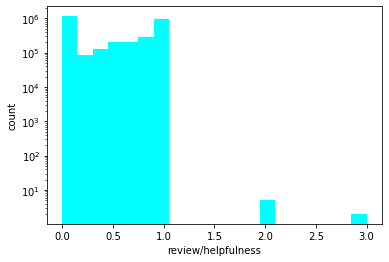

In [18]:
plt.hist(x=rating_data['review/helpfulness'], color='cyan', log=True, bins=20);
plt.xlabel('review/helpfulness')
plt.ylabel('count');

2 и 3 приравнивем к 1 (или возможно были перепутаны числитель со знаменателем)

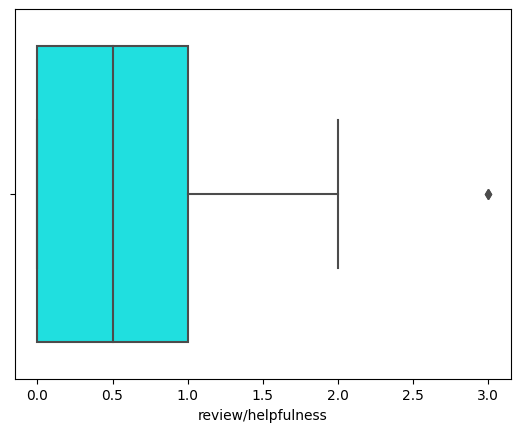

In [5]:
sns.boxplot(x=rating_data['review/helpfulness'], color='cyan');

## Score

In [19]:
score_count = rating_data['review/score'].value_counts()
print(score_count)

5.0    1807343
4.0     585616
3.0     254295
1.0     201688
2.0     151058
Name: review/score, dtype: int64


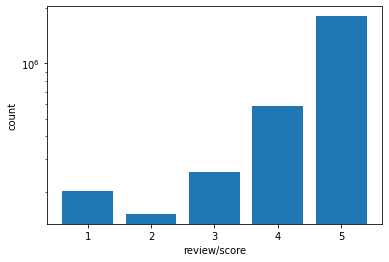

In [20]:
plt.bar(x=score_count.index, height=score_count.values, log=True);
plt.xlabel('review/score')
plt.ylabel('count');

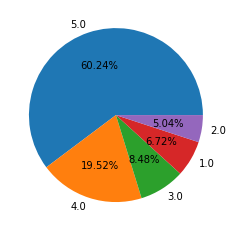

In [15]:
plt.pie(labels=score_count.index, x=score_count.values, autopct='%1.2f%%');

Классы не сбалансированны и хороших отзывов значительно больше остальных и следовательно для оценки классификаторов лучше использовать f-меру либо roc-auc

### Time

Данная колонка является меткой времени - кол-во секунд, отсчитанных от 1 января 1970 до даты отправки отзыва (в предобработке сделал замену - Leon)

In [21]:
from datetime import date

print(rating_data['review/time'][0])
print(date.fromtimestamp(rating_data['review/time'][0]))

940636800
1999-10-23


Выделить столбцы(месяц, число, год)

In [22]:
rating_data['review/time'] = rating_data['review/time'].apply(lambda x : date(1970,1, 1) if x == -1 else date.fromtimestamp(x))
rating_data['review/month'] = rating_data['review/time'].apply(lambda x : x.month)
rating_data['review/day'] = rating_data['review/time'].apply(lambda x : x.day)
rating_data['review/year'] = rating_data['review/time'].apply(lambda x : x.year)

Для конкретных дат подсчитать value_counts и вывести топ-10 (как в profileName). На диаграмму.

In [23]:
review_time_count = rating_data['review/time'].value_counts()
review_time_count

2012-09-06    5232
2013-02-18    4357
2012-12-19    4011
2013-01-04    3948
2007-01-09    3883
              ... 
1995-08-18       1
1995-12-01       1
1995-07-30       1
1995-10-10       1
1995-12-08       1
Name: review/time, Length: 6272, dtype: int64

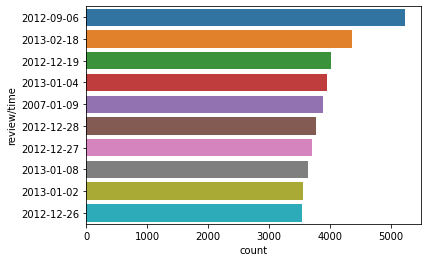

In [26]:
sns.barplot(y=review_time_count[:10:].index, x=review_time_count[:10:].values)
plt.ylabel('review/time')
plt.xlabel('count');

То же самое для года, посмотреть годы (unique)

In [37]:
review_year_count = rating_data['review/year'].value_counts()
review_year_count

2012    297992
2000    224550
1999    221566
2005    204774
2006    192886
2001    189822
2002    184622
2004    178292
2003    177124
2011    171331
2007    170188
2013    160076
2010    158615
2009    152264
2008    143528
1998    123989
1997     41786
1996      6307
1995       267
1970        21
Name: review/year, dtype: int64

In [28]:
len(rating_data['review/year'].unique())

20

Потом переделать на bar с логарифмической шкалой как в User_id

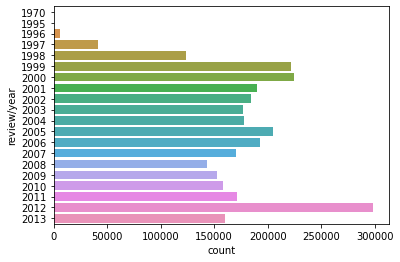

In [40]:
sns.barplot(y=review_year_count.index, x=review_year_count.values, orient='h')
plt.ylabel('review/year')
plt.xlabel('count');

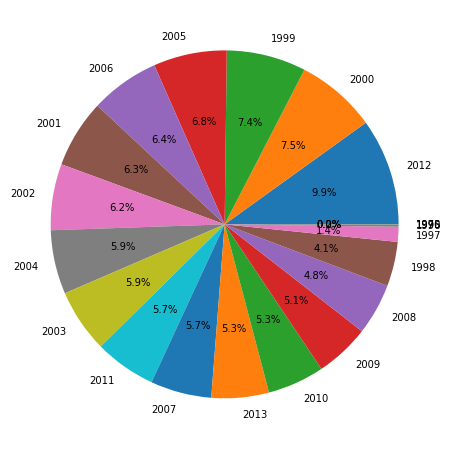

In [42]:
plt.figure(figsize=(8,8))
plt.pie(labels=review_year_count.index, x=review_year_count.values, autopct='%1.1f%%');

То же самой для месяца, только вывести всё на диаграмму.

In [36]:
review_month_count = rating_data['review/month'].value_counts()
review_month_count

1     348110
2     282887
12    281639
3     245025
10    239572
11    238441
7     231697
8     230960
5     229554
9     225316
6     224911
4     221888
Name: review/month, dtype: int64

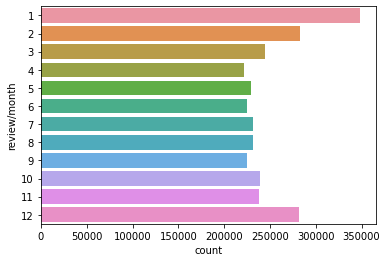

In [39]:
sns.barplot(y=review_month_count.index, x=review_month_count.values, orient='h')
plt.ylabel('review/month')
plt.xlabel('count');

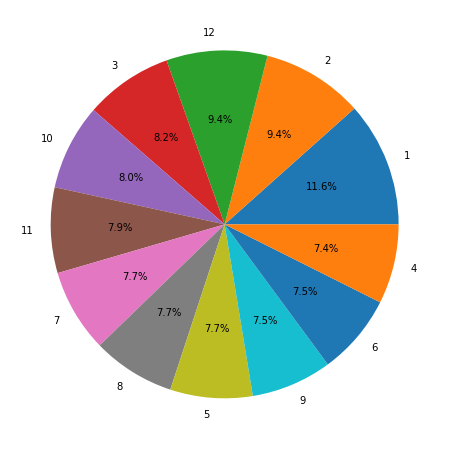

In [43]:
plt.figure(figsize=(8,8))
plt.pie(labels=review_month_count.index, x=review_month_count.values, autopct='%1.1f%%');

То же самой для дня, только вывести всё на диаграмму.

### Summary

Доп колонка длина Summary в символах

In [48]:
s_array = rating_data['review/summary'].to_numpy().copy()
s_array

array(['Nice collection of Julie Strain images', 'Really Enjoyed It',
       'Essential for every personal and Public Library', ...,
       'Easier reads of those not well versed in historiography',
       'Yes, it is cheaper than the University Bookstore',
       "Collingwood's ideas sink in a quagmire or verbiage."],
      dtype=object)

In [49]:
for i in range(len(s_array)):
    s_array[i] = len(str(s_array[i]))
s_array

array([38, 17, 47, ..., 55, 48, 51], dtype=object)

In [50]:
rating_data['review/summary_char_len'] = s_array
rating_data.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/month,review/day,review/year,review/summary_char_len
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,10,23,1999,38
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,9,21,2004,17
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",3,9,2004,47
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,25,2004,47
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2,10,2005,22


Hist для нее

Увеличить размер фигуры, лог. ось(?)

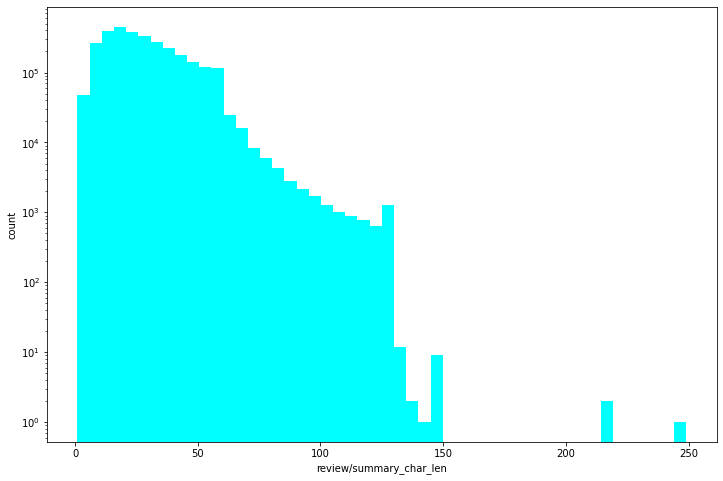

In [52]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/summary_char_len'], color='cyan', log=True, bins=50);
plt.xlabel('review/summary_char_len')
plt.ylabel('count');

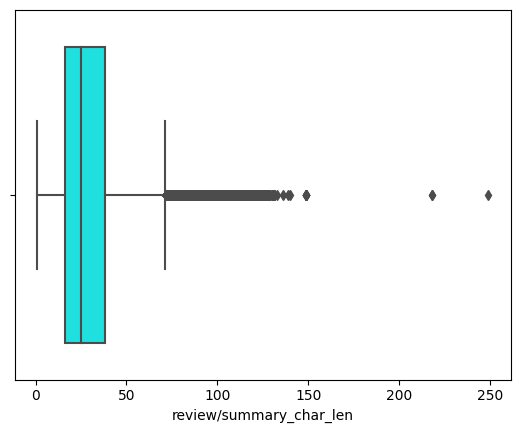

In [28]:
sns.boxplot(x=rating_data['review/summary_char_len'], color='cyan');

Доп колонка длина Summary в словах

In [53]:
words_array = rating_data['review/summary'].to_numpy().copy()
words_array

array(['Nice collection of Julie Strain images', 'Really Enjoyed It',
       'Essential for every personal and Public Library', ...,
       'Easier reads of those not well versed in historiography',
       'Yes, it is cheaper than the University Bookstore',
       "Collingwood's ideas sink in a quagmire or verbiage."],
      dtype=object)

In [54]:
for i in range(len(words_array)):
    words_array[i] = len(str(words_array[i]).split(' '))
words_array

array([6, 3, 7, ..., 9, 8, 8], dtype=object)

In [55]:
rating_data['review/summary_words_len'] = words_array
rating_data.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/month,review/day,review/year,review/summary_char_len,review/summary_words_len
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,10,23,1999,38,6
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,9,21,2004,17,3
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",3,9,2004,47,7
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,25,2004,47,8
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2,10,2005,22,3


hist и boxplot для нее

См. длину Summary в символах

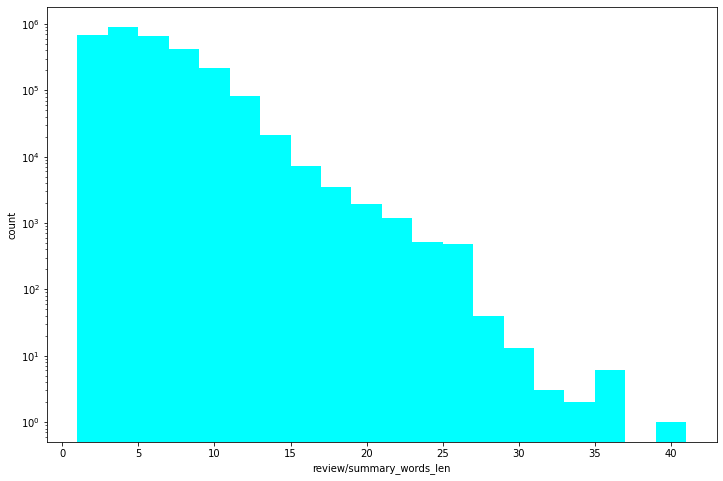

In [57]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/summary_words_len'], color='cyan', log=True, bins=20);
plt.xlabel('review/summary_words_len')
plt.ylabel('count');

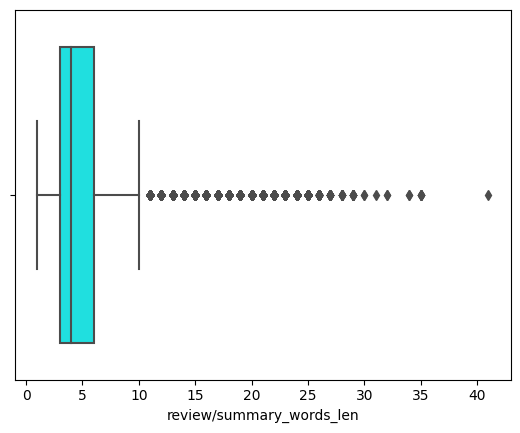

In [33]:
sns.boxplot(x=rating_data['review/summary_words_len'], color='cyan');

Wordcloud для самой колонки summary

Увеличить размер

(-0.5, 399.5, 199.5, -0.5)

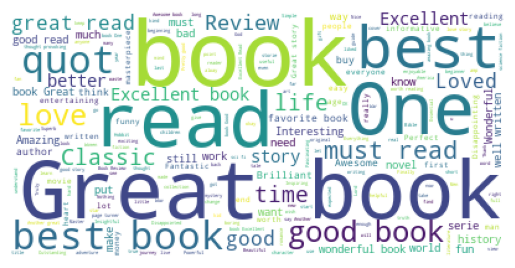

In [10]:
temp_array = rating_data['review/summary'].to_numpy().copy()
text_array = []

for i in range(len(temp_array)):
    if (len(str(temp_array[i])) > 0):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

### Text

В символах

In [58]:
s_array = rating_data['review/text'].to_numpy().copy()
s_array

array(["This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either.",
       "I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they hav

In [59]:
for i in range(len(s_array)):
    s_array[i] = len(str(s_array[i]))
s_array

array([457, 1423, 1752, ..., 161, 258, 316], dtype=object)

In [60]:
rating_data['review/text_char_len'] = s_array
rating_data.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/month,review/day,review/year,review/summary_char_len,review/summary_words_len,review/text_char_len
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,10,23,1999,38,6,457
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,9,21,2004,17,3,1423
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",3,9,2004,47,7,1752
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,25,2004,47,8,3662
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2,10,2005,22,3,1542


hist и boxplot для неё

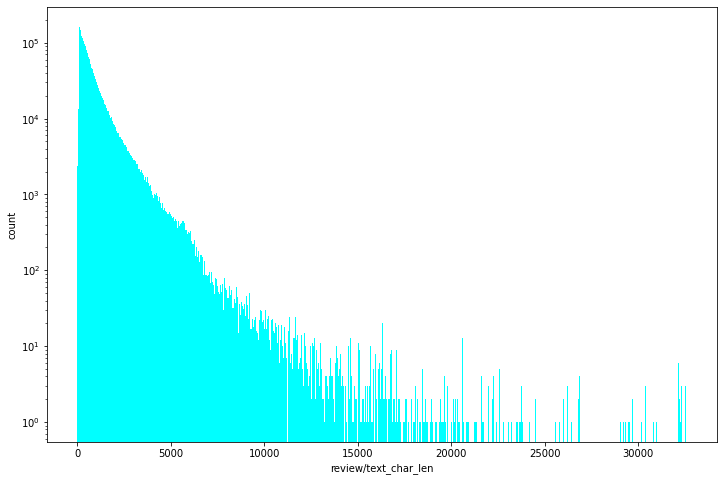

In [61]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/text_char_len'], color='cyan', log=True, bins=1000);
plt.xlabel('review/text_char_len')
plt.ylabel('count');

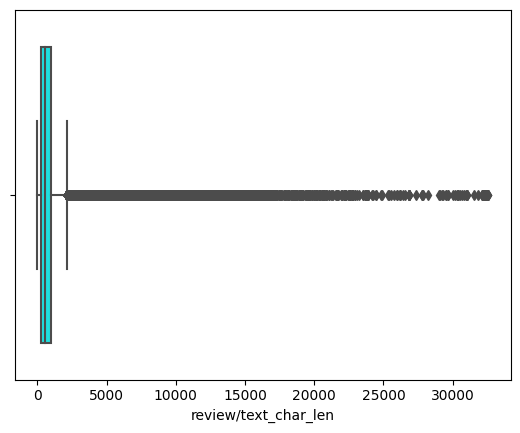

In [39]:
sns.boxplot(x=rating_data['review/text_char_len'], color='cyan');

В словах

In [62]:
words_array = rating_data['review/text'].to_numpy().copy()
words_array

array(["This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either.",
       "I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my mind--that's a good testimonial to the power of Rel's writing and thinking. Rel plays Dr. Seuss the ultimate compliment of treating him as a serious poet as well as one of the 20th century's most interesting visual artists, and after reading his book I decided that a trip to the Mandeville Collections of the library at University of California in San Diego was in order, so I could visit some of the incredible Seuss/Geisel holdings they hav

In [63]:
for i in range(len(words_array)):
    words_array[i] = len(str(words_array[i]).split(' '))
words_array

array([86, 252, 310, ..., 28, 47, 52], dtype=object)

In [64]:
rating_data['review/text_words_len'] = words_array
rating_data.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/month,review/day,review/year,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,10,23,1999,38,6,457,86
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,9,21,2004,17,3,1423,252
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",3,9,2004,47,7,1752,310
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,25,2004,47,8,3662,560
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2,10,2005,22,3,1542,273


hist и boxplot для неё

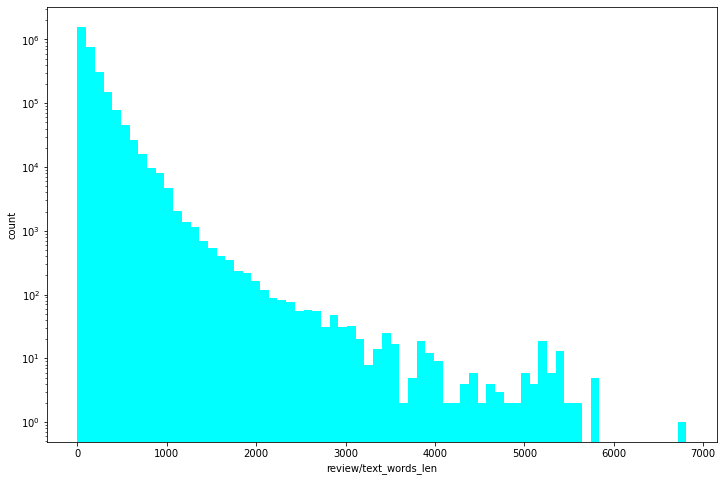

In [65]:
plt.figure(figsize=(12,8))
plt.hist(x=rating_data['review/text_words_len'], color='cyan', log=True, bins=70);
plt.xlabel('review/text_words_len')
plt.ylabel('count');

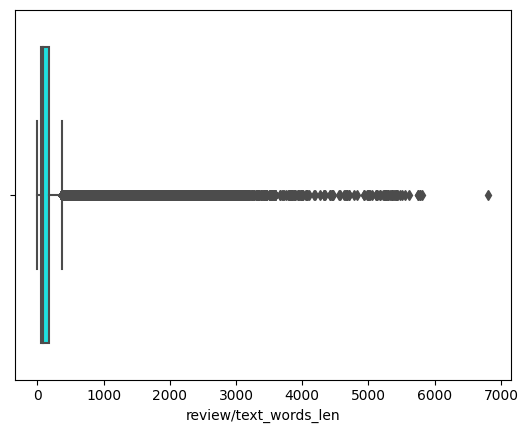

In [44]:
sns.boxplot(x=rating_data['review/text_words_len'], color='cyan');

Облако слов

(-0.5, 399.5, 199.5, -0.5)

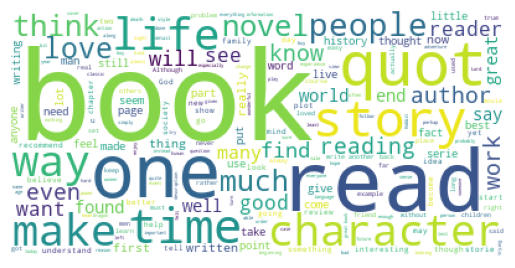

In [45]:
temp_array = rating_data['review/text'].to_numpy().copy()
text_array = []

for i in range(len(temp_array[:100000])):
    if (len(str(temp_array[i])) > 0):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

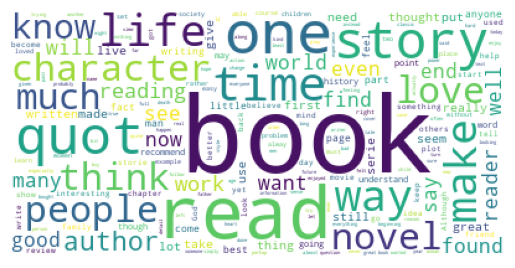

In [46]:
temp_array = rating_data['review/text'].to_numpy().copy()
text_array = []

for i in range(len(temp_array[:200000])):
    if (len(str(temp_array[i])) > 0):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

### Description

См. замечания Summary

В символах

In [19]:
s_array = books_data['description'].to_numpy().copy()
s_array

array([nan,
       'Philip Nel takes a fascinating look into the key aspects of Seuss\'s career - his poetry, politics, art, marketing, and place in the popular imagination." "Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like "nerd." And Seuss\'s famously loopy artistic style - what Nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover',
       'This resource includes twelve principles in understanding small church worship, fifteen practices for planning worship with fewer than 100 people, and suggestions for congregational study.',
       ...,
       "Give your Mamaw a useful, beautiful and thoughtful gift that she'll Love! This pretty blank lined journal will be perfect for your grandmother for a journal, quotes about gran

In [20]:
for i in range(len(s_array)):
    s_array[i] = len(str(s_array[i]))
s_array

array([3, 581, 188, ..., 784, 739, 652], dtype=object)

In [21]:
books_data['description_char_len'] = s_array
books_data.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,description_char_len
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,3
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,581
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,188
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,1026
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,3


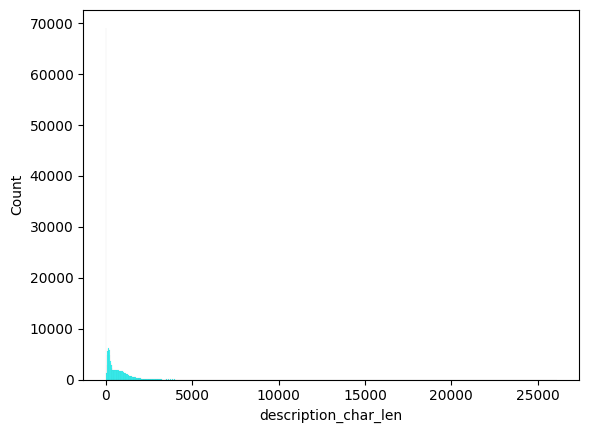

In [50]:
sns.histplot(x=books_data['description_char_len'], color='cyan');

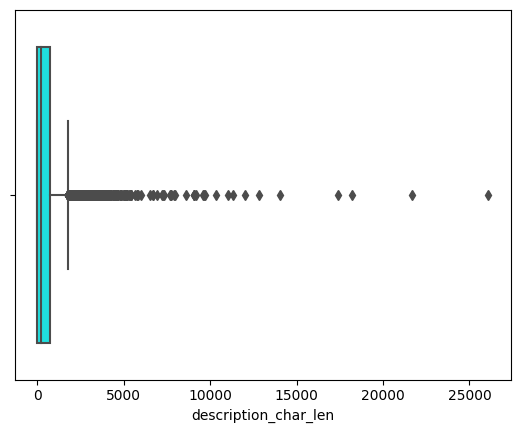

In [51]:
sns.boxplot(x=books_data['description_char_len'], color='cyan');

В словах

In [22]:
words_array = books_data['description'].to_numpy().copy()
words_array

array([nan,
       'Philip Nel takes a fascinating look into the key aspects of Seuss\'s career - his poetry, politics, art, marketing, and place in the popular imagination." "Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like "nerd." And Seuss\'s famously loopy artistic style - what Nel terms an "energetic cartoon surrealism" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover',
       'This resource includes twelve principles in understanding small church worship, fifteen practices for planning worship with fewer than 100 people, and suggestions for congregational study.',
       ...,
       "Give your Mamaw a useful, beautiful and thoughtful gift that she'll Love! This pretty blank lined journal will be perfect for your grandmother for a journal, quotes about gran

In [23]:
for i in range(len(words_array)):
    words_array[i] = len(str(words_array[i]).split(' '))
words_array

array([1, 93, 25, ..., 127, 122, 98], dtype=object)

In [24]:
books_data['description_words_len'] = words_array
books_data.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,description_char_len,description_words_len
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,3,1
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,581,93
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN,188,25
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN,1026,192
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN,3,1


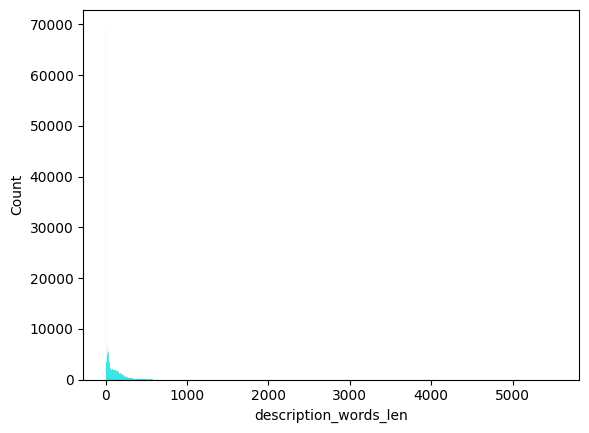

In [55]:
sns.histplot(x=books_data['description_words_len'], color='cyan');

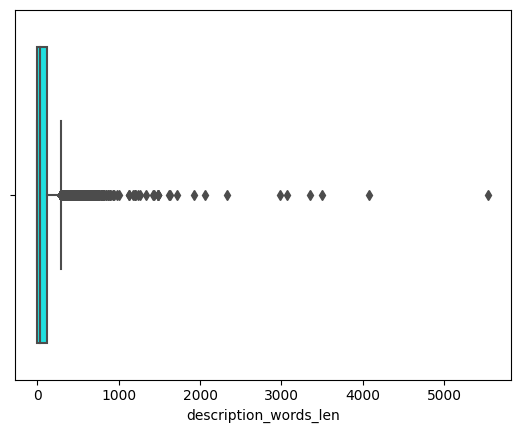

In [56]:
sns.boxplot(x=books_data['description_words_len'], color='cyan');

Облако слов

(-0.5, 399.5, 199.5, -0.5)

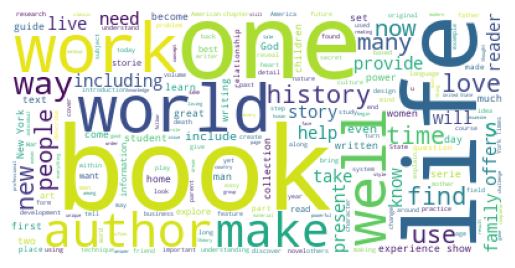

In [57]:
temp_array = books_data['description'].to_numpy().copy()
text_array = []

for i in range(len(temp_array)):
    if (len(str(temp_array[i])) > 0 and str(temp_array[i]) != 'nan'):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

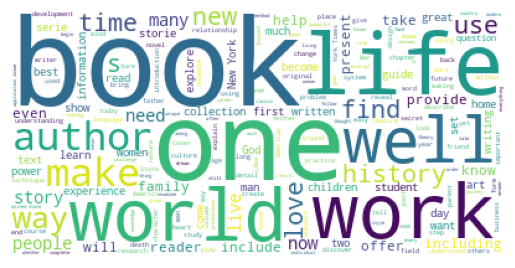

In [58]:
temp_array = books_data['description'].to_numpy().copy()
text_array = []

for i in range(len(temp_array)):
    if (len(str(temp_array[i])) > 0 and str(temp_array[i]) != 'nan'):
        text_array.append(str(temp_array[i]))

text = ' '.join(text_array)
cloud = WordCloud(background_color="white").generate(text)
plt.imshow(cloud)
plt.axis('off')

### Authors

Нужно вяснить сколько максимум авторов у книги, нужно сделать множество авторов

Сделать колонки авторов

??? Группировка сколько книг у автора

Пропуски - написать либо Undefinde либо попробовать найти в интернете

### Publisher

Тоже самое что для user_id

In [40]:
publisher_count = books_data.publisher.value_counts()
print(publisher_count)

Simon and Schuster                 3454
Penguin                            2825
Routledge                          2394
John Wiley & Sons                  2031
Harper Collins                     1911
                                   ... 
Amer Assn for Vocational              1
Blue Gem Publishing                   1
Brotherhood of Life Books             1
Frazer Press                          1
Strategic Wealth Solutions, LLC       1
Name: publisher, Length: 16016, dtype: int64


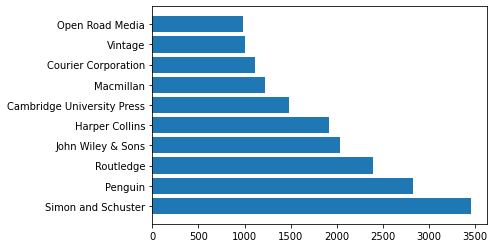

In [41]:
plt.barh(y=publisher_count[:10:].index, width=publisher_count[:10:].values);

### Categories

Тоже самое что и для авторов, однако группировка по категориям обязательна, а в пропусках писать no-categorie

### Raitings count

Это мы удаляем

### Сохранили новый DF

In [ ]:
rating_data.to_csv('Rating_data_with_additional.csv', index=False)

In [5]:
#rating_data = pd.read_csv('Rating_data_with_additional.csv')

## Исследование зависимостей

In [3]:
rating_data.columns

Index(['Unnamed: 0', 'Id', 'Title', 'Price', 'User_id', 'profileName',
       'review/helpfulness', 'review/score', 'review/time', 'review/summary',
       'review/text', 'review/month', 'review/day', 'review/year',
       'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len'],
      dtype='object')

In [4]:
num_cols_and_target = ['review/helpfulness', 'review/score', 'review/summary_char_len', 'review/summary_words_len', 
                        'review/text_char_len', 'review/text_words_len']

num_cols = ['review/helpfulness', 'review/summary_char_len', 'review/summary_words_len', 'review/text_char_len', 
            'review/text_words_len']

cat_cols_and_target = ['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/score', 'review/time', 'review/month', 
                        'review/day', 'review/year']

cat_cols = ['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/time', 'review/month', 'review/day', 'review/year']

text_cols = ['review/summary', 'review/text']


Сделали набор числовых колонок + целевая колонка

На будущее: подсчитать статистические характеристики

In [5]:
rating_data[num_cols]

,review/helpfulness,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len
0,1.000000,38,6,457,86
1,1.000000,17,3,1423,252
2,0.909091,47,7,1752,310
3,1.000000,47,8,3662,560
4,1.000000,22,3,1542,273
...,...,...,...,...,...
2999995,0.736842,9,1,554,90
2999996,1.000000,45,8,597,103
2999997,0.000000,55,9,161,28
2999998,0.090909,48,8,258,47


In [6]:
corr_matrix = pd.DataFrame.corr(rating_data[num_cols])

In [7]:
corr_matrix = rating_data[num_cols].corr()

In [8]:
corr_matrix

,review/helpfulness,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len
review/helpfulness,1.000000,0.137833,0.111131,0.224229,0.221564
review/summary_char_len,0.137833,1.000000,0.920472,0.228760,0.224133
review/summary_words_len,0.111131,0.920472,1.000000,0.195425,0.195693
review/text_char_len,0.224229,0.228760,0.195425,1.000000,0.996861
review/text_words_len,0.221564,0.224133,0.195693,0.996861,1.000000


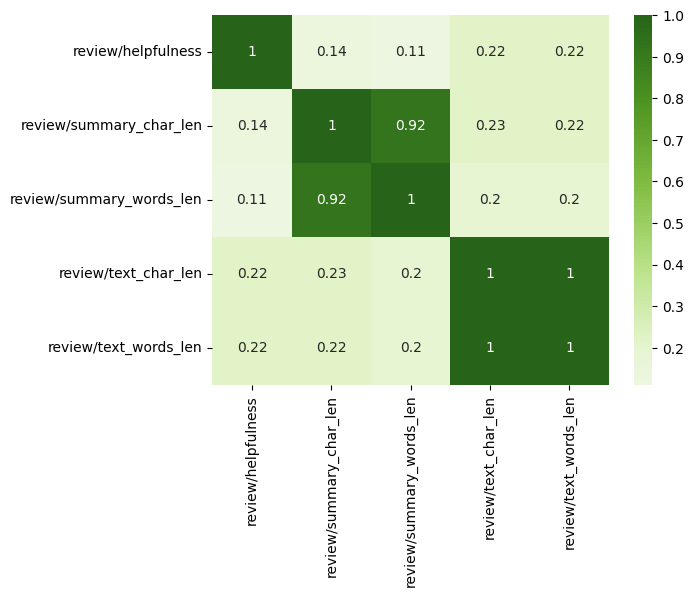

In [9]:
# plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap="PiYG", annot=True, center=0);

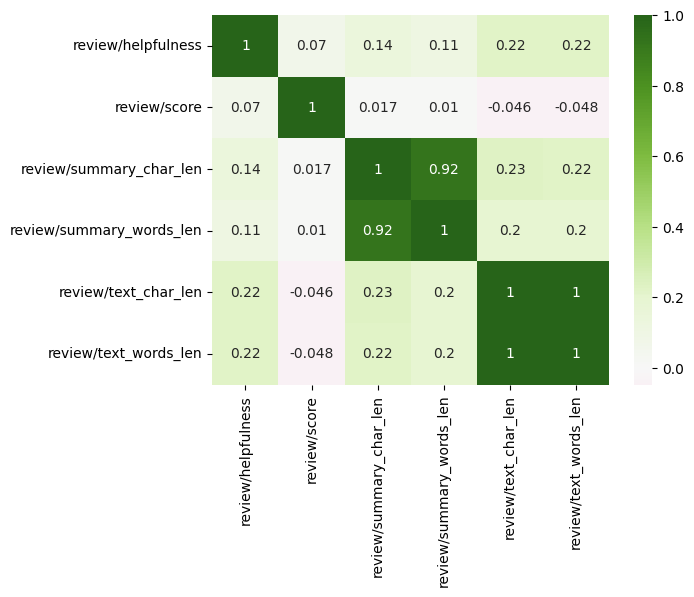

In [10]:
corr_matrix_num_target = pd.DataFrame.corr(rating_data[num_cols_and_target])
sns.heatmap(corr_matrix_num_target, cmap="PiYG", annot=True, center=0);

C:\Users\sorok\AppData\Local\Temp\ipykernel_3324\3471042596.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_num_cat_target = pd.DataFrame.corr(rating_data[[*num_cols, *cat_cols_and_target]], method='spearman')


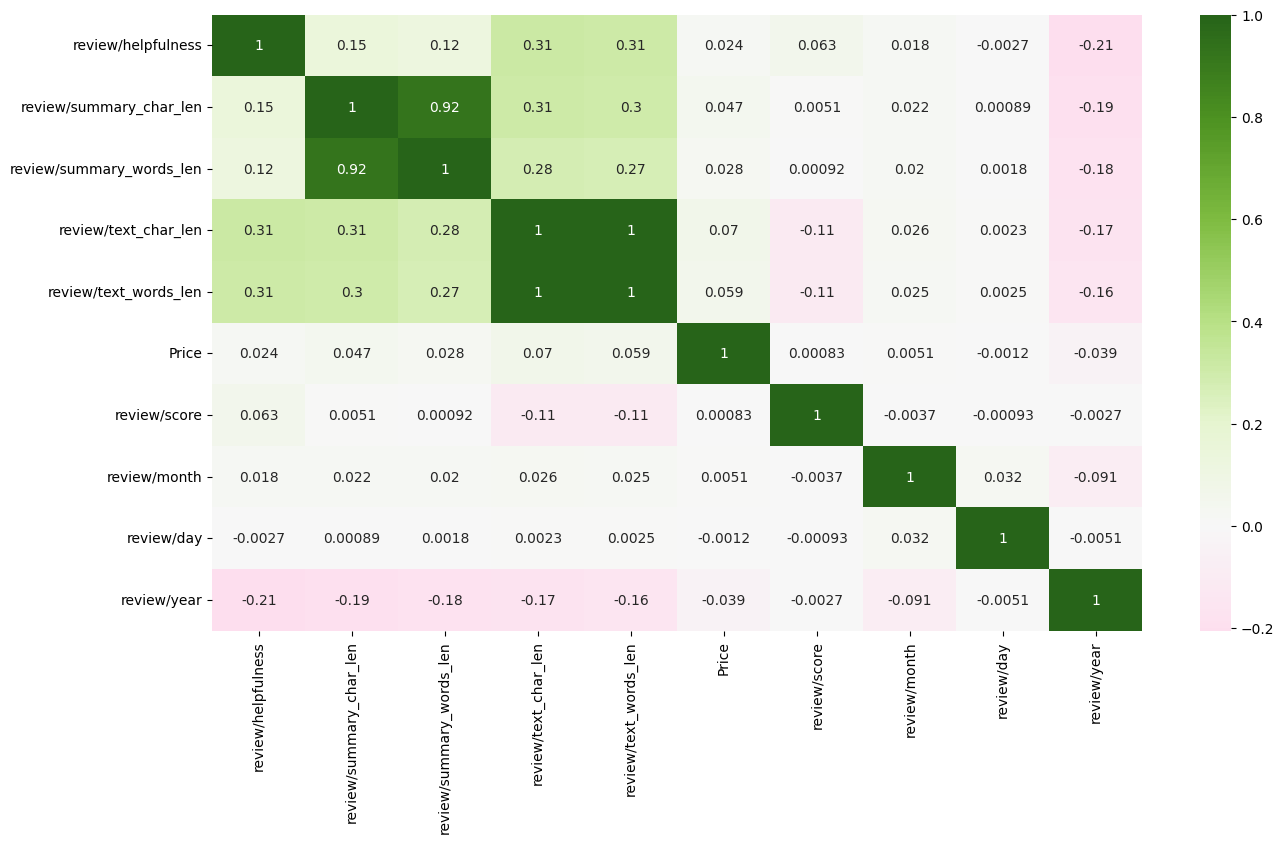

In [11]:
plt.figure(figsize=(15, 8))
corr_matrix_num_cat_target = pd.DataFrame.corr(rating_data[[*num_cols, *cat_cols_and_target]], method='spearman')
sns.heatmap(corr_matrix_num_cat_target, cmap="PiYG", annot=True, center=0);

In [4]:
rating_data.columns

Index(['Unnamed: 0', 'Id', 'Title', 'Price', 'User_id', 'profileName',
       'review/helpfulness', 'review/score', 'review/time', 'review/summary',
       'review/text', 'review/month', 'review/day', 'review/year',
       'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len'],
      dtype='object')

### summary_char_len + summary_words_len

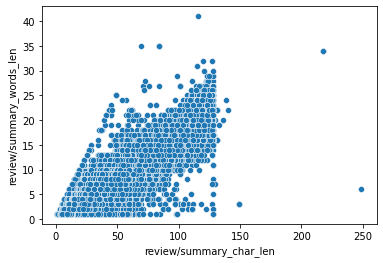

In [5]:
sns.scatterplot(data=rating_data, x='review/summary_char_len', y='review/summary_words_len');

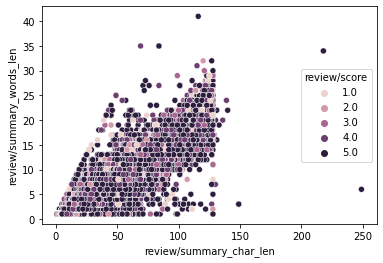

In [6]:
sns.scatterplot(data=rating_data, x='review/summary_char_len', y='review/summary_words_len', hue='review/score');

### review/month + review/score

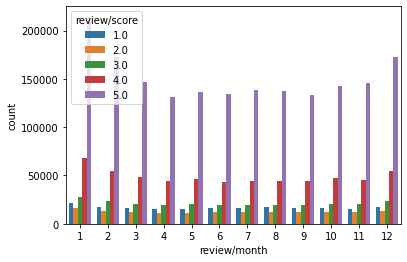

In [7]:
sns.countplot(data=rating_data, x='review/month', hue='review/score');

#### Логарифмическую ось нужно сделать

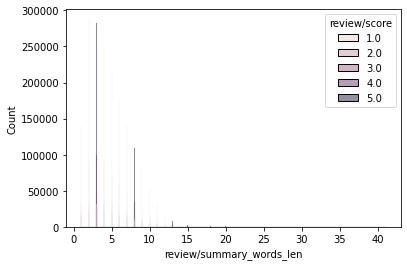

In [9]:
sns.histplot(data=rating_data, x='review/summary_words_len', hue='review/score');

Разобраться почему тоут не 5 разных цветов

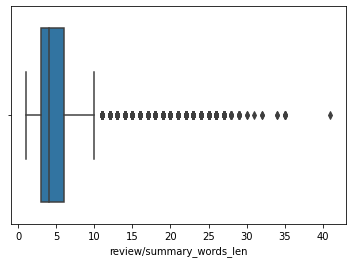

In [10]:
sns.boxplot(data=rating_data, x='review/summary_words_len', hue='review/score');

- категориальный + категориальный = столбчатая диаграмма с оттенокм (bar/barplot)
- числовой + категориальный = гистограмма с оттенокм и boxplot с оттенком
- числовой + числовой = scatterplot 

1. Посмотреть зависимости всех признаков и целевого
2. Посмотреть зависимости всех признаков друг от друга

### User_id + Profile_name

In [11]:
user_id_profile_name_df = rating_data[['User_id', 'profileName']].drop_duplicates()

In [12]:
user_id_profile_name_df.head()

,User_id,profileName
0,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz"""
1,A30TK6U7DNS82R,Kevin Killian
2,A3UH4UZ4RSVO82,John Granger
3,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher"""
4,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore"""


In [16]:
user_id_profile_name_df.duplicated().sum()

0

In [14]:
user_id_profile_name_df.shape

(1009377, 2)

In [13]:
len(user_id_profile_name_df.User_id.unique())

1008973

In [15]:
len(user_id_profile_name_df.profileName.unique())

854147

#### Сделать тоже самое для id и title

1. Нужно подобрать размер для wordcloud-ов
2. Запустить на полном датасете
3. Попробовать сделать скоры по порядку
4. Сделать тоже самое для review/text

In [3]:
rating_data['review/summary'] = rating_data['review/summary'].astype(str)

In [5]:
scores_lst = rating_data['review/score'].unique().sort()

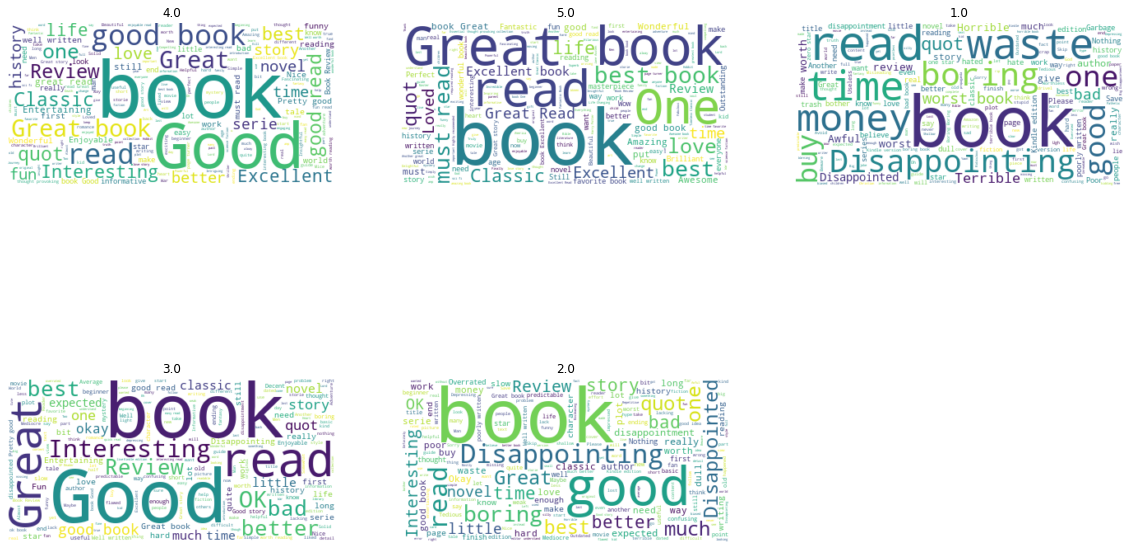

In [21]:
fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust()#(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

plot_amount = [i for i in range(len(rating_data['review/score'].unique()))]

for i, current_score in zip(plot_amount, rating_data['review/score'].unique()):
  current_df = rating_data[rating_data['review/score'] == current_score]
  ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
  current_text = " ".join(i for i in current_df['review/summary'])
  wordcloud = WordCloud(background_color="white").generate(current_text)
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  ax.set_title(current_score);

In [6]:
rating_data['review/text'] = rating_data['review/text'].astype(str)
scores_lst = rating_data['review/score'].unique().sort()

fig = plt.figure(figsize=(20, 12))
fig.subplots_adjust()#(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

plot_amount = [i for i in range(len(rating_data['review/score'].unique()))]

for i, current_score in zip(plot_amount, rating_data['review/score'].unique()):
  current_df = rating_data[rating_data['review/score'] == current_score]
  ax = fig.add_subplot(2, 3, i + 1, xticks=[], yticks=[])
  current_text = " ".join(i for i in current_df['review/text'])
  wordcloud = WordCloud(background_color="white").generate(current_text)
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis("off")
  ax.set_title(current_score);

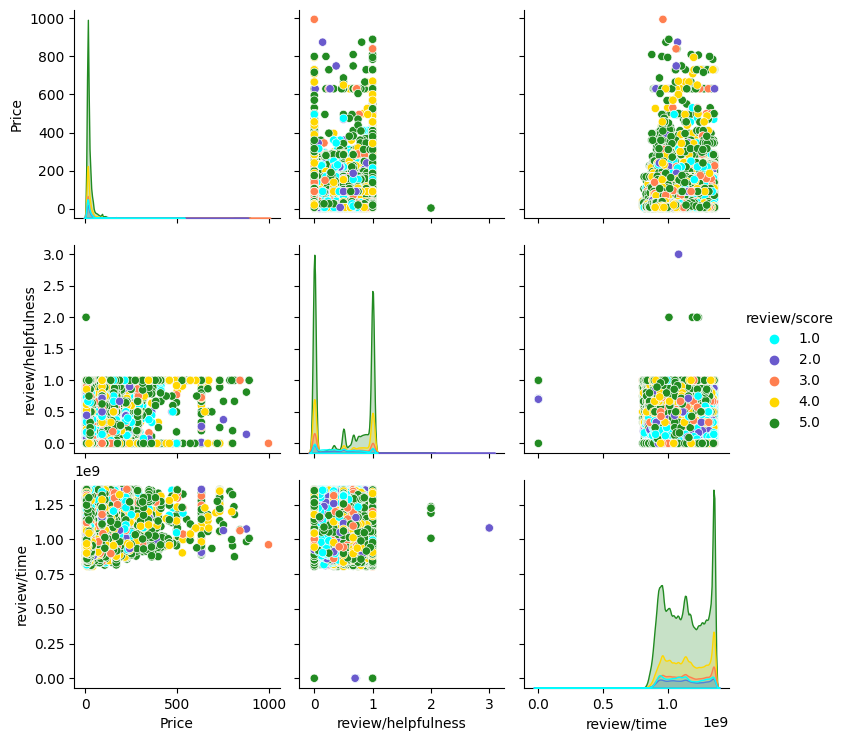

In [26]:
colors = sns.color_palette(['aqua', 'slateblue', 'coral', 'gold', 'forestgreen'])
sns.pairplot(rating_data[num_columns], hue='review/score', palette=colors);

matplotlib.pyplot.savefig для сохранения графиков в файл

# Предобработка

-----------------------------Предобработка-----------------------------

-----Колонки-----

удалить price(более 70% пропусков), ratingsCount(более 70% пропусков), image(работаем только с текстом), previewLink(ссылка), infoLink(ссылка)

привести review/time к одному виду(сделано в разведочном анализе)

удалить дубликаты

обрезать review/helpfuness

sin/cos для time

удалить пропуски review/summary, review/text, title

заменить пропуски User_id, profileName

вынести списки признаков

-----Очистка мусора-----

перевести текст в нижний регистр

удалить теги

удалить спец. символы

удалить пунктуацию

удалить лидирующие и конечные пробелы (пример: ' a b c  ' -> 'a b c')

stemming

-----Извлечение признаков-----

encoding для категориальных признаков (categories)

vectorizer (tf-idf) с удалением стоп-слов

Предварительная зачистка

In [ ]:
# удалить price
rating_data = rating_data.drop(columns='Price')

# удалить дубликаты
rating_data = rating_data.drop_duplicates()

# обрезать review/helpfuness
rating_data['review/helpfulness'] = rating_data['review/helpfulness'].apply(lambda x: 1.0 if x >= 1.0 else x)

# sin/cos с time
rating_data['review/month_sin'] = np.sin(2 * np.pi * rating_data['review/month'] / 12)
rating_data['review/month_cos'] = np.cos(2 * np.pi * rating_data['review/month'] / 12)

rating_data['review/day_sin'] = np.sin(2 * np.pi * rating_data['review/day'] / 31)
rating_data['review/day_cos'] = np.cos(2 * np.pi * rating_data['review/day'] / 31)

# удаление пропусков в summary, text, title
rating_data = rating_data[rating_data['review/summary'].notna()]
rating_data = rating_data[rating_data['review/text'].notna()]
rating_data = rating_data[rating_data['Title'].notna()]

# замена пропусков в User_id, profileName
rating_data['User_id'] = rating_data['User_id'].fillna('user_id_unknown')
rating_data['profileName'] = rating_data['profileName'].fillna('profile_unknown')

In [4]:
rating_data.isna().sum()

Id                          0
Title                       0
User_id                     0
profileName                 0
review/helpfulness          0
review/score                0
review/time                 0
review/summary              0
review/text                 0
review/month                0
review/day                  0
review/year                 0
review/summary_char_len     0
review/summary_words_len    0
review/text_char_len        0
review/text_words_len       0
review/month_sin            0
review/month_cos            0
review/day_sin              0
review/day_cos              0
dtype: int64

In [11]:
rating_data.head(5)

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,review/month,review/day,review/year,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len,review/month_sin,review/month_cos,review/day_sin,review/day_cos
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",1.000000,4.0,1999-10-23,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,10,23,1999,38,6,457,86,-0.866025,5.000000e-01,-0.998717,-0.050649
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,1.000000,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,9,21,2004,17,3,1423,252,-1.000000,-1.836970e-16,-0.897805,-0.440394
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,0.909091,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",3,9,2004,47,7,1752,310,1.000000,6.123234e-17,0.968077,-0.250653
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",1.000000,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",7,25,2004,47,8,3662,560,-0.500000,-8.660254e-01,-0.937752,0.347305
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",1.000000,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,2,10,2005,22,3,1542,273,0.866025,5.000000e-01,0.897805,-0.440394


Удаление text с малой длиной (поиск бессмыслицы)

In [46]:
short_text_15 = rating_data[rating_data['review/text_char_len'] <= 15]
short_text_15['review/text'].head(50)

1033             Very goo
15752          PROPHETIC!
16697     Gillian Anderso
18080                 yes
18891                   1
20594                 Why
20772            i love i
26772           Fantastic
29681           It sucked
30582                1,00
31344     One of the best
43697      TYPICS PROBLEM
47585        This book Su
50954      To many detail
59941            good boo
60681                 yes
71964         i don't kno
76228      yuhfhfhdd h fh
82050              histor
82166              afadfd
82818                   1
87151           I like it
88746          1000% grea
90876      Test review...
95043         HAHAHHAH696
99972                 oka
103214        HAHAHHAH696
110991          Loved it!
112381                HUH
120393    speech to fast.
120938         DUH DUH DU
122052        I loved it.
126061                 ee
131950             I like
135258    I expected more
136389           good boo
140455              asdas
143995         good progr
147226    i 

Выкинуть <= 20

In [4]:
short_text_20 = rating_data[rating_data['review/text_char_len'] <= 20]
short_text_20['review/text']

1033                 Very goo
4606       A good mystery-boo
7048       Length:: 4:02 Mins
15752              PROPHETIC!
16697         Gillian Anderso
                  ...        
2973659      You must read it
2974306        Test review...
2975616            1000% grea
2976301             I like it
2997770                   goo
Name: review/text, Length: 885, dtype: object

In [44]:
short_text_25 = rating_data[rating_data['review/text_char_len'] <= 25]
short_text_25['review/text'].head(50)

1033                      Very goo
2493        It is a spanish editio
4554      The book was really good
4606            A good mystery-boo
7043        A great Read....enjoy.
7048            Length:: 4:02 Mins
7898     I Loved It...Didn't You??
10252    I Loved It...Didn't You??
15752                   PROPHETIC!
16697              Gillian Anderso
18080                          yes
18891                            1
18923     The author shows promise
20594                          Why
20636        Iloved the sex parts.
20772                     i love i
21459           oooooooooooookkkkk
26772                    Fantastic
29202            VERY WELL WRITTEN
29681                    It sucked
29839           Length:: 0:39 Mins
30582                         1,00
31344              One of the best
34434    a very well designed book
42979    WOW, that's all I can say
43697               TYPICS PROBLEM
47585                 This book Su
47643       A very interesting boo
50954               

In [43]:
short_text_30 = rating_data[rating_data['review/text_char_len'] <= 30]
short_text_30['review/text'].head(50)

542       THE BEST BOOK I READ IN YEARS
1033                           Very goo
2493             It is a spanish editio
4161      A very good book! A must read
4554           The book was really good
4606                 A good mystery-boo
6159       A great book! A great writer
6689       Exceptionally fine narrative
7043             A great Read....enjoy.
7048                 Length:: 4:02 Mins
7898          I Loved It...Didn't You??
8451        Recieved in Good Condition.
10252         I Loved It...Didn't You??
10815      I went to buy the book pleas
13786     I think my title says enough.
15042        1984 only 4.5 stars rectif
15752                        PROPHETIC!
16697                   Gillian Anderso
17065    I don't know nothing about tha
18080                               yes
18107      this is a good book. buy it.
18189        The novel is a mind worker
18891                                 1
18923          The author shows promise
20476    read it and you will know why!


Выкинуть summary с малой длиной (поиск бессмыслицы)

In [41]:
short_summary_10 = rating_data[rating_data['review/text_char_len'] <= 10]
short_summary_10['review/text'].head(50)

1033        Very goo
15752     PROPHETIC!
18080            yes
18891              1
20594            Why
20772       i love i
26772      Fantastic
29681      It sucked
30582           1,00
59941       good boo
60681            yes
82050         histor
82166         afadfd
82818              1
87151      I like it
88746     1000% grea
99972            oka
110991     Loved it!
112381           HUH
120938    DUH DUH DU
126061            ee
131950        I like
136389      good boo
140455         asdas
143995    good progr
149737        fdsafd
153447             w
168186       terribl
203068      must rea
206125           tes
209771         buy i
222290          1,00
228791         Decen
234535      good boo
239081      Good Boo
260273           END
266735        afadfd
270072      excellen
277731    Fabulous!!
315497            wo
338074           Coo
349664    No comment
375893     Loved it!
377650        125636
410567    1000% grea
412255     I like it
450139    very stupi
455421      w

Убрать <= 7

In [5]:
short_summary_7 = rating_data[rating_data['review/text_char_len'] <= 7]
short_summary_7['review/text']

18080          yes
18891            1
20594          Why
30582         1,00
60681          yes
            ...   
2908347         he
2911407    bad boo
2946242         wo
2950375        Goo
2997770        goo
Name: review/text, Length: 169, dtype: object

Удаление записей с summary <= 7 и review/text <= 20

In [48]:
len(rating_data)

2988182

In [6]:
rating_data = rating_data.drop(list(short_summary_7.index.unique()) + list(short_text_20.index.unique()))

In [8]:
len(rating_data)

2987297

Удаление отзывов с нелатинскими символами в summary и review/text (их нет)

In [22]:
symbols = set()

def countSymbos(data):
    for sym in data:
        if sym not in symbols:
            symbols.add(sym)

In [23]:
rating_data['review/summary'].apply(countSymbos)
rating_data['review/text'].apply(countSymbos)

In [24]:
symbols

{'\x01',
 '\x02',
 '\x03',
 '\x04',
 '\x05',
 '\x06',
 '\x07',
 '\x08',
 '\x0e',
 '\x0f',
 '\x10',
 '\x11',
 '\x12',
 '\x13',
 '\x14',
 '\x15',
 '\x16',
 '\x17',
 '\x18',
 '\x19',
 '\x1b',
 '\x1d',
 '\x1f',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x7f'}

Функция предобработки текста

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import regex as re
import string
#from num2words import num2words
from bs4 import BeautifulSoup

stemmer = PorterStemmer()
stop_words = stopwords.words('english')
def text_preprocessing(text):
    text = str(text)

    # числа в слова
    # nums = re.findall(r'[0-9]+\.?[0-9]*', text)
    # for num in nums:
    #    text = text.replace(num, num2words(num))

    # нижний регистр
    text = text.lower()

    # очистка тегов
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    text = soup.get_text()

    # удалить спец. символы
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    # удалить лидирующие пробелы
    text = text.strip()

    # удалить пунктуакцию
    text = text.translate(text.maketrans('', '', string.punctuation))

    # stemming
    text = word_tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)

    return text

In [7]:
rating_data['review/summary'] = rating_data['review/summary'].apply(text_preprocessing)
rating_data.to_csv('preprocessed_summary.csv', index=False)

In [ ]:
part_1 = rating_data[:500000]
part_2 = rating_data[500000 : 1000000]
part_3 = rating_data[1000000 : 1500000]
part_4 = rating_data[1500000 : 2000000]
part_5 = rating_data[2000000 : 2500000]
part_6 = rating_data[2500000:]

In [6]:
from pandarallel import pandarallel
pandarallel.initialize()

part_1['review/text'] = part_1['review/text'].parallel_apply(text_preprocessing)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/tmp/ipykernel_1572/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1572/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1572/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1572/1888102919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [10]:
from pandarallel import pandarallel
pandarallel.initialize()
part_2['review/text'] = part_2['review/text'].parallel_apply(text_preprocessing)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


/tmp/ipykernel_1564/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1564/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/tmp/ipykernel_1564/2337581857.py:24: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_3['review/text'] = part_3['review/text'].parallel_apply(text_preprocessing)

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_4['review/text'] = part_4['review/text'].parallel_apply(text_preprocessing)

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_5['review/text'] = part_5['review/text'].parallel_apply(text_preprocessing)

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize()

part_6['review/text'] = part_6['review/text'].parallel_apply(text_preprocessing)

In [50]:
rating_data.to_csv('full_preprocessed.csv')

# Learning

In [2]:
rating_data = pd.read_csv('preprocessed_clean_full.csv')

Списки признаков

In [28]:
rating_data.columns

Index(['Id', 'Title', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text',
       'review/month', 'review/day', 'review/year', 'review/summary_char_len',
       'review/summary_words_len', 'review/text_char_len',
       'review/text_words_len', 'review/month_sin', 'review/month_cos',
       'review/day_sin', 'review/day_cos'],
      dtype='object')

In [14]:
# Id - id книги(не отзыва), поэтому категориальный
target  = 'review/score'
categorial_features = ['Id', 'Title', 'User_id', 'profileName', 'review/year']
num_features = ['review/helpfulness', 'review/summary_char_len', 'review/summary_words_len',
       'review/text_char_len', 'review/text_words_len']
text_features = ['review/summary', 'review/text']

already_proccessed_features = ['review/month_sin', 'review/month_cos',
       'review/day_sin', 'review/day_cos']
all_features = [*categorial_features, *num_features, *text_features, *already_proccessed_features]
all_features

['Id',
 'Title',
 'User_id',
 'profileName',
 'review/year',
 'review/helpfulness',
 'review/summary_char_len',
 'review/summary_words_len',
 'review/text_char_len',
 'review/text_words_len',
 'review/summary',
 'review/text',
 'review/month_sin',
 'review/month_cos',
 'review/day_sin',
 'review/day_cos']

Функция, которая возвращает pipeline на основе columnTransformer

Возможно, стоит добавить Наивного Байеса.

И нужно добавить ансамбли - Random Forest из sklearn и cat boost, xgboost, lgmboost из отдельных библиотек. До кучи можно добавить нейросеть пока из sklearn MLPClassifier

In [24]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self, X):
        return X.drop(self.columns, axis=1)

    def fit(self, X):
        return self 

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline

import catboost as ctb
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

def getPipeline(_encoder = OneHotEncoder(),
                _vectorizer = TfidfVectorizer(),
                _scaler = MinMaxScaler(),
                _decomposer = PCA(),
                _classificator = KNeighborsClassifier()):
    preprocessor = ColumnTransformer([
        ("encoding", _encoder, categorial_features),
        ("scaling", _scaler, num_features),
        ("vectorizing", _vectorizer, text_features)], 
        remainder='passthrough')
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('decomposer', _decomposer),
        ('classificator', _classificator)
    ])

    return pipe

In [5]:
encoders = [OneHotEncoder(), OrdinalEncoder()]
vectorizers = [TfidfVectorizer(), CountVectorizer()]
scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
decomposers = [PCA(), TSNE()]
# протестировать с разными параметрами

simple_classifiers = [KNeighborsClassifier(), svm.SVC(), tree.DecisionTreeClassifier(), 
                  LogisticRegression(), SGDClassifier()]

ensemble_classifiers = [ctb.CatBoostClassifier(), xgb.XGBClassifier(),
                  RandomForestClassifier()]

nn_classifiers = [MLPClassifier()]


Надо сначала посчитать несколько метрик для вашего датасета - ф скор с микро, макро и взвешенным усреднением и рок аук; а потом выбрать ту, которая циферки получше покажет, и перезапустить только с ней. Ну либо забацать полноценное исследование с ними четырьмя, если все 4 неплохие результаты покажут
И, наверное, лучше сделать три раздела для анализа - отдельно простые методы, отдельно ансамбли и отдельно многослойный перцептрон.

Тест getPipeline(в процессе)

In [26]:
# разделение данных на тренировочные и тестируемые
X = rating_data[all_features][:5000]
Y = rating_data['review/score'][:5000]

In [17]:
encoder = LabelEncoder()
for column in categorial_features:
    X[column] = encoder.fit_transform(X[[column]])

e:\Program Files\Python\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Program Files\Python\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Program Files\Python\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Program Files\Python\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [18]:
scaler = StandardScaler()
for column in num_features:
    X[column] = scaler.fit_transform(X[[column]])

In [19]:
tf = TfidfVectorizer()
text_vec = tf.fit_transform(X['review/text']).toarray()
summary_vec = tf.fit_transform(X['review/summary']).toarray()

In [20]:
text_vec.shape

(5000, 36956)

In [21]:
summary_vec.shape

(5000, 3666)

In [22]:
text_vec_cols = ['text_tf_idf_' + str(i) for i in range(text_vec.shape[1])]
text_vec_df = pd.DataFrame(text_vec, columns=text_vec_cols)
text_vec_df

,text_tf_idf_0,text_tf_idf_1,text_tf_idf_2,text_tf_idf_3,text_tf_idf_4,text_tf_idf_5,text_tf_idf_6,text_tf_idf_7,text_tf_idf_8,text_tf_idf_9,...,text_tf_idf_36946,text_tf_idf_36947,text_tf_idf_36948,text_tf_idf_36949,text_tf_idf_36950,text_tf_idf_36951,text_tf_idf_36952,text_tf_idf_36953,text_tf_idf_36954,text_tf_idf_36955
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.051528,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
summary_vec_cols = ['summary_tf_idf_' + str(i) for i in range(summary_vec.shape[1])]
summary_vec_df = pd.DataFrame(summary_vec, columns=summary_vec_cols)
summary_vec_df

,summary_tf_idf_0,summary_tf_idf_1,summary_tf_idf_2,summary_tf_idf_3,summary_tf_idf_4,summary_tf_idf_5,summary_tf_idf_6,summary_tf_idf_7,summary_tf_idf_8,summary_tf_idf_9,...,summary_tf_idf_3656,summary_tf_idf_3657,summary_tf_idf_3658,summary_tf_idf_3659,summary_tf_idf_3660,summary_tf_idf_3661,summary_tf_idf_3662,summary_tf_idf_3663,summary_tf_idf_3664,summary_tf_idf_3665
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X = pd.concat([X, text_vec_df], axis=1)
X

,Id,Title,User_id,profileName,review/year,review/helpfulness,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len,...,text_tf_idf_36946,text_tf_idf_36947,text_tf_idf_36948,text_tf_idf_36949,text_tf_idf_36950,text_tf_idf_36951,text_tf_idf_36952,text_tf_idf_36953,text_tf_idf_36954,text_tf_idf_36955
0,280,173,3728,1622,3,1.144352,0.596702,0.401914,-0.382246,-0.348821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,152,85,2030,1862,8,1.144352,-0.730848,-0.659665,0.707524,0.767440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152,85,2888,1663,8,0.932807,1.165653,0.755773,1.078678,1.157458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,152,85,1674,2847,8,1.144352,1.165653,1.109633,3.233400,2.838573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,152,85,1128,773,9,1.144352,-0.414765,-0.659665,0.841771,0.908653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,72,197,2800,610,17,1.144352,-0.161898,0.048054,-0.425115,-0.436238,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,72,197,2954,1453,17,1.144352,0.154186,0.401914,-0.563874,-0.557279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,72,197,420,1232,15,1.144352,0.027752,0.401914,0.118642,0.168963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,72,197,2670,2264,14,1.144352,-0.351548,-0.305806,-0.584181,-0.597625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X.shape

(5000, 16)

In [26]:
text_vec_df.shape

(5000, 36956)

In [29]:
text_vec_df.index

RangeIndex(start=0, stop=5000, step=1)

In [35]:
X = pd.concat([X, summary_vec_df], axis=1)
X.head(5)

,Id,Title,User_id,profileName,review/year,review/helpfulness,review/summary_char_len,review/summary_words_len,review/text_char_len,review/text_words_len,...,summary_tf_idf_3656,summary_tf_idf_3657,summary_tf_idf_3658,summary_tf_idf_3659,summary_tf_idf_3660,summary_tf_idf_3661,summary_tf_idf_3662,summary_tf_idf_3663,summary_tf_idf_3664,summary_tf_idf_3665
0,280,173,3728,1622,3,1.144352,0.596702,0.401914,-0.382246,-0.348821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,152,85,2030,1862,8,1.144352,-0.730848,-0.659665,0.707524,0.767440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,152,85,2888,1663,8,0.932807,1.165653,0.755773,1.078678,1.157458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,152,85,1674,2847,8,1.144352,1.165653,1.109633,3.233400,2.838573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,152,85,1128,773,9,1.144352,-0.414765,-0.659665,0.841771,0.908653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X = X.drop(['review/text', 'review/summary'], axis=1)

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
clf.score(x_test, y_test)

0.593